In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import percentileofscore

In [3]:
import matplotlib.pyplot as plt

In [4]:
tt = pd.read_csv('titanic_train.csv')

In [5]:
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [68]:
tt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [69]:
tt.shape

(891, 12)

In [70]:
import seaborn as sns
%matplotlib inline

In [71]:
tt.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


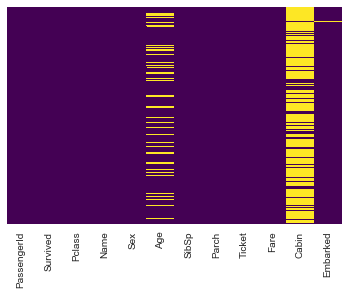

In [72]:
 sns.heatmap(tt.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')

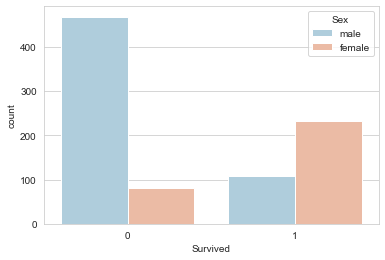

In [73]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex',data = tt,palette='RdBu_r')

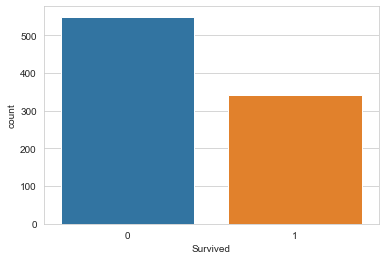

In [74]:
sns.countplot(x='Survived', data = tt)

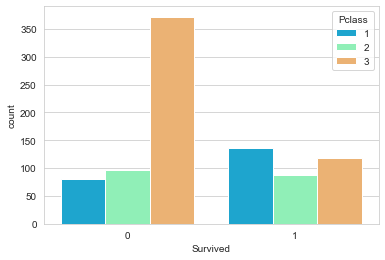

In [75]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue = 'Pclass', data = tt, palette = 'rainbow')

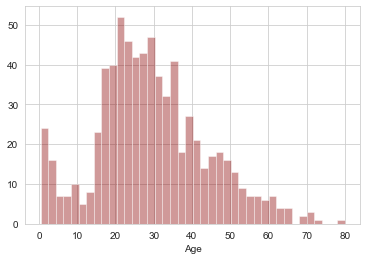

In [76]:
sns.distplot(tt['Age'].dropna(),kde=False, color = 'darkred', bins = 40)

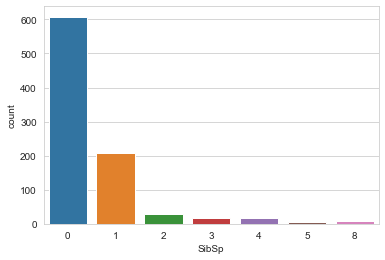

In [77]:
sns.countplot(x='SibSp',data = tt)

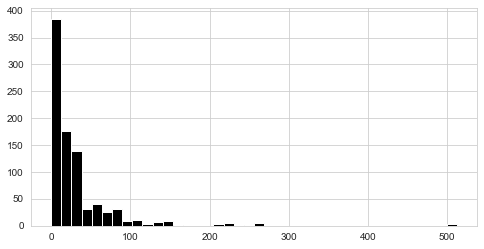

In [78]:
tt['Fare'].hist(color = 'black', bins = 40, figsize = (8,4))

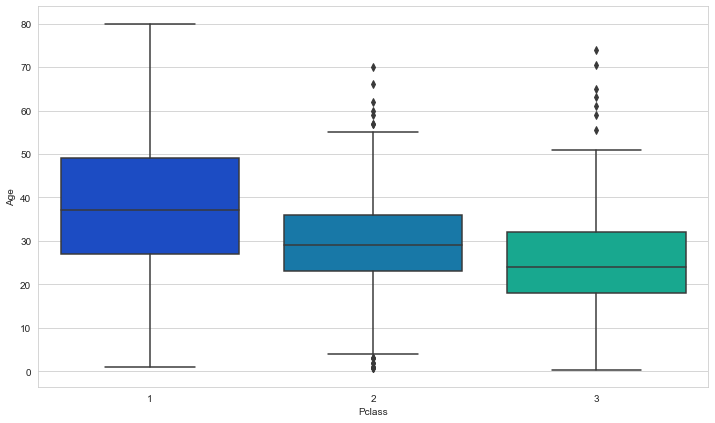

In [79]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data= tt, palette = 'winter')

In [80]:
def impute_age(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [81]:
tt['Age'] = tt[['Age','Pclass']].apply(impute_age,axis = 1)

NameError: ("name 'Pclass' is not defined", 'occurred at index 5')

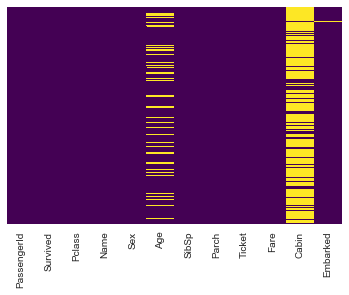

In [65]:
 sns.heatmap(tt.isnull(),yticklabels = False,cbar = False, cmap = 'viridis')